# <center> **Custom Head Detector using YoloV8** </center>
 

## 1. Literature Review

For video survellience tasks, head detections is one of the most important tasks. It can be used to develop tracking systems, crowd counting and crowd density estimation [1]. However, detecting heads with full variation of camera view points, poses, appearances, and scales is still a challenging task to do [2]. Recently, convolutional neural networks (CNN) have gained achieved a tremendous success for object detection and classification tasks [2]. 

In this project, we built a Yolov8 based head detection model that aims to detect human heads in a crowd. The model was trained and evaluated using a dataset that can be found on Kaggle. The dataset includes morethan 14000 training images, and morethan 3000 validation images. The dataset includes annotations of two classes (head and person); however, for the sake of this project, only the head class is utilized. 

In this report, we will go over the influence of changing the hyperparameters to maximize the performance of our head detection model. 

## 2. Results and Analysis

### *Selecting an Optimizer*

The first test we did was selecting which optimizer is the best for our model. YoloV8 allows us to select from the following set of optimizers: SGD, Adam, Adamax, AdamW, NAdam, RAdam, RMSProp, or auto. When selecting auto, the Ultralytics library either selects AdamW, or SGD based on the dataset. For our case it selected SGD, hence its results will be associated with SGD. Keeping all other hyperparameters the same, the results showed that SGD and AdamW showed the best performance as compared to others. SGD had a slightly better results as shown below. Meanwhile, RMSProp performed worst. The details are as shown below.

    Models  mAP @0.5
0      SGD     0.688
1     Adam     0.671
2    Adamx     0.686
3    AdamW     0.685
4    NAdam     0.671
5    RAdam     0.673
6  RMSProp     0.472


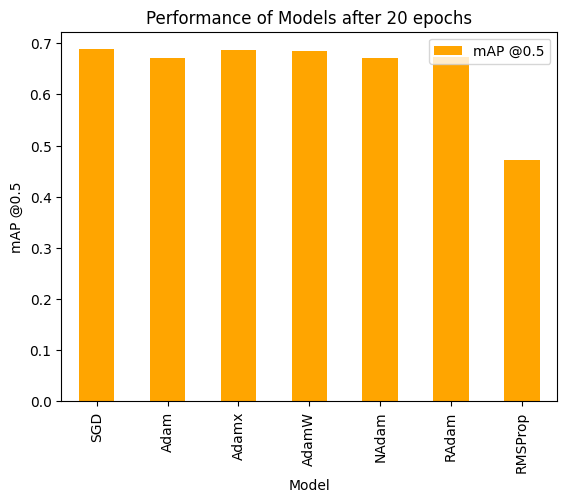

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# mAP @0.5
data = {"Models": ["SGD", "Adam", "Adamx", "AdamW", "NAdam", "RAdam", "RMSProp"],
        "mAP @0.5": [0.688, 0.671, 0.686, 0.685, 0.671, 0.673, 0.472]
       }
df = pd.DataFrame(data)
print(df)
df.plot.bar(x='Models', y='mAP @0.5', color='orange')

# Add a title and labels to the axes
plt.title('Performance of Models after 20 epochs')
plt.xlabel('Model')
plt.ylabel('mAP @0.5')

# Show the plot
plt.show()


The results showed that most most of them fell in the range of 0.6 - 0.7 except for the model that was optimized using RMSProp. SGD did the best as compared to all the other models. Hence, we are going to select SGD as our optimizer for the rest of the experiments.

### *Effect of changing batch size*

We tried to select the optimum batch size that can optimize our VRAM usage. However, the results showed that a batch size of 64 worked best with our training data. The expermiment was done using the YoloV8 nano model size, and batch sizes ranging from 4 to 128. The results are as shown below.

   Batch Size  mAP @0.5
0           2     0.688
1           4     0.671
2           8     0.686
3          32     0.685
4          64     0.671
5         128     0.673


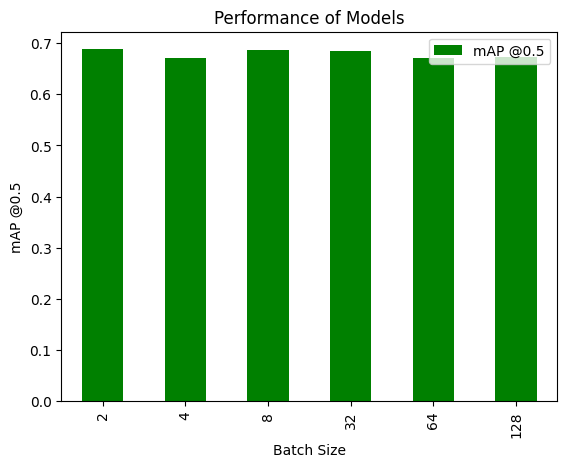

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# mAP @0.5
data = {"Batch Size": [2, 4, 8, 32, 64, 128],
        "mAP @0.5": [0.688, 0.671, 0.686, 0.685, 0.671, 0.673]
       }
df = pd.DataFrame(data)
print(df)
df.plot.bar(x='Batch Size', y='mAP @0.5', color='green')

# Add a title and labels to the axes
plt.title('Performance of Models')
plt.xlabel('Batch Size')
plt.ylabel('mAP @0.5')

# Show the plot
plt.show()

### *Effect of changing the learning rate and cosine scheduler*

We experimented with constant and varying learning rates (with and without a consine scheduler). According to our findings, models trained using cosine schedulers (with initial and final learning rates opitmized for the best combination using Raytune library) performed marginally better as compared to the others. The results are as shown below. 

          Experiment  mAP @0.5
0  Without Scheduler     0.688
1   Cosine Scheduler     0.671


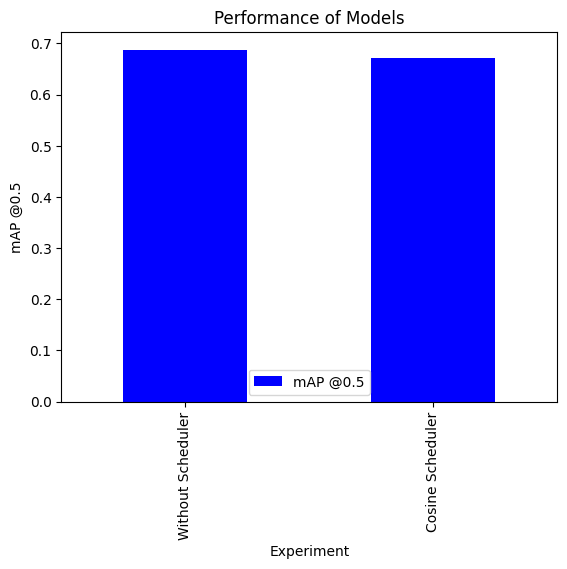

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# mAP @0.5
data = {"Experiment": ["Without Scheduler", "Cosine Scheduler"],
        "mAP @0.5": [0.688, 0.671]
       }
df = pd.DataFrame(data)
print(df)
df.plot.bar(x='Experiment', y='mAP @0.5', color='blue')

# Add a title and labels to the axes
plt.title('Performance of Models')
plt.xlabel('Experiment')
plt.ylabel('mAP @0.5')

# Show the plot
plt.show()

### *Effect of increasing the number of epochs*

For the initial experiments, the number of epochs were restricted to merely 20-30 epochs inorder to save up computational resources. But what if we increased the number of epochs keeping other hyperparameters the same? According to our experiments, as we increased the number of epochs, the model improved slightly on every epoch. Models that were run for more than 50 epochs performed marginally better than those who were trained on just 20 epochs. The detailed results are as shown below. 

### *Effect of changing the model size*

YoloV8 object detection model has different ranges of sizes ranging from nano to extra large. As we increase the model size, we also increase the layers of CNN used, training time, and also speed of inference. The results showed that as we increase the model size, the performance of the model improved (sometimes drastically, and other times by a small margin). 
The details are as shown below.

## References

[1] V. B. Subburaman, A. Descamps and C. Carincotte, "Counting People in the Crowd Using a Generic Head Detector," 2012 IEEE Ninth International Conference on Advanced Video and Signal-Based Surveillance, Beijing, China, 2012, pp. 470-475, doi: 10.1109/AVSS.2012.87.

[2] S. D. Khan, H. Ullah, M. Ullah, F. A. Cheikh and A. Beghdadi, "Dimension Invariant Model for Human Head Detection," 2019 8th European Workshop on Visual Information Processing (EUVIP), Roma, Italy, 2019, pp. 99-104, doi: 10.1109/EUVIP47703.2019.8946163.

Dataset: https://www.kaggle.com/datasets/hilongnguyn/human-crowd-dataset 